# Week 9 Homework

*See subsections for homework answer and explanations*

In [1]:
# import modules for python and data
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import math
import statistics
from scipy import stats
import seaborn as sns
import pprint

belize_listings_path = "../belize_airbnb_listings.csv"
belize_df = pd.read_csv(belize_listings_path)

In [2]:
belize_df.tail(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2786,48244370,Regal Suite with King bed - San Ignacio Resort...,60399527,San Ignacio,Cayo,Cayo,17.153220,-89.068150,Private room,367,1,0,NaN,NaN,5,350
2787,48244399,Regal Suite w/Queen & double bed-San Ignacio R...,60399527,San Ignacio,Cayo,Cayo,17.152890,-89.068160,Private room,367,1,0,NaN,NaN,5,353
2788,48266532,Dynamite Apt w/ pool on Beach Front,144478335,Brandon,Belize,Belize Islands,17.739740,-88.026150,Entire home/apt,90,2,0,NaN,NaN,4,358
2789,48279157,Hummingbird pink one bedroom cabin with pool,604999,Bobbi,Belize,Belize Islands,17.737670,-88.027470,Entire home/apt,118,2,0,NaN,NaN,22,348
2790,48282452,"Garden apt w/porch, kitchen, AC, WIFI, bikes, ...",733857,Jacki,Stann Creek,Stann Creek Mainland,16.526140,-88.367100,Entire home/apt,121,7,0,NaN,NaN,5,188
2791,48283996,Magical Island,17994012,Ronald,Belize,Belize Islands,17.945690,-87.944620,Entire home/apt,1054,3,0,NaN,NaN,2,347
2792,48287613,"The Luxury Suite - Corozal, Bz- 3Bdr/2bthr CASA1",375769845,Michael,Corozal,Corozal,18.374630,-88.400190,Entire home/apt,401,3,0,NaN,NaN,2,302
2793,48296096,Lagoon front apartment w/shared pool - two mi...,76414486,Vacasa Belize,Belize,Belize Islands,17.934580,-87.955220,Entire home/apt,252,1,0,NaN,NaN,204,364
2794,48296978,Beachfront Poolside Condo,15308338,Alexandra,Belize,Belize Islands,17.930010,-87.957120,Entire home/apt,242,3,0,NaN,NaN,4,364
2795,48332221,Standard Room - San Ignacio Resort Hotel,60399527,San Ignacio,Cayo,Cayo,17.154127,-89.069689,Private room,226,1,0,NaN,NaN,5,365


### Create Histograms

Reviews per month and number of review

Bin size choosen on what graph seems to best represent the data.  Too many bins is overkill, and too few bins look like an inaccurate data representation.

In a study group, another student mentioned the RICE rule for bin size.   It's not something I did here, but I can see where it would be useful.  Rice rule = 2* cubed root (n) = ~28.
https://en.wikipedia.org/wiki/Histogram has a nice short discussion on bin size.  I did choose 50 for some bin sizes which is approximated the square root of the number of rows.

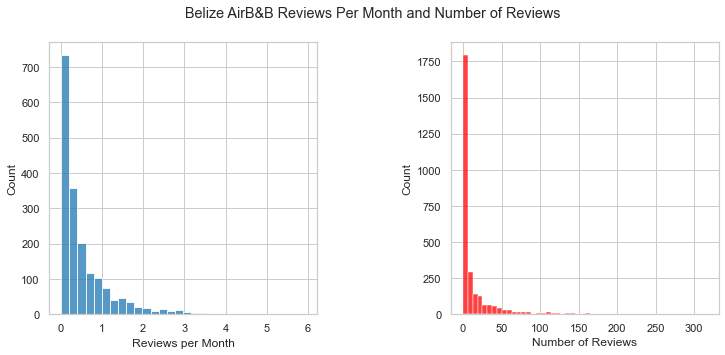

In [3]:
# Create the subplots, with style and title
sns.set_style('whitegrid')
sns.set_context('notebook')
fig, axes = plt.subplots(1, 2, figsize =(12,5))
fig.suptitle('Belize AirB&B Reviews Per Month and Number of Reviews')
plt.subplots_adjust(wspace = 0.5)
# make subplots
ax = sns.histplot(ax=axes[0], data=belize_df['reviews_per_month'], bins = 30)
ax.set(xlabel = 'Reviews per Month')
ax2 = sns.histplot(ax=axes[1], data=belize_df, x = 'number_of_reviews', bins = 50, color = 'r');
ax2.set(xlabel = "Number of Reviews");

### Box and Whisker Plot for Availabilty 365

This plot shows that most rentals (approximately 75%) are available at least 220 days.  Very few rental properties have little to no availability  - thus the outliers.

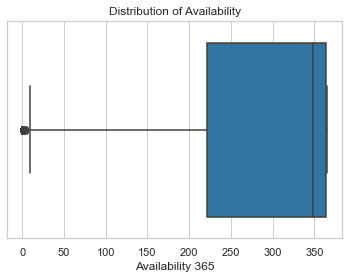

In [4]:
ax = sns.boxplot(x="availability_365", data = belize_df)
ax.set_title('Distribution of Availability')
ax.set_xlabel('Availability 365');

In [5]:
print(belize_df['availability_365'].describe())

count    2796.000000
mean      280.315451
std       120.617632
min         0.000000
25%       221.000000
50%       349.000000
75%       364.000000
max       365.000000
Name: availability_365, dtype: float64


#### Gathering price information to better understand the data

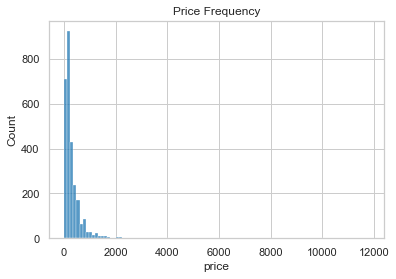

In [6]:
sns.histplot(x='price', data = belize_df, bins = 100)
plt.title('Price Frequency');

In [7]:
belize_df['price'].describe()

count     2796.000000
mean       357.102289
std        563.124825
min         20.000000
25%        135.000000
50%        220.000000
75%        394.250000
max      11788.000000
Name: price, dtype: float64

In [8]:
# this might be valid if price was a normal distribution, but clearly not normal above
# ignore cell, just for my own understanding
stats.norm.cdf(50, 357, 563)

0.2927759838151833

In [9]:
# checking my understanding of importing scipy.stats
from scipy.stats import norm
stats.norm.cdf(50, 357, 563)

0.2927759838151833

### Probability of the Price for an AirBnB below $50

1.75% is the probability of an AirBnB below $50.

Of the 49 rentals available under $50, 36 are some type of shared arrangement.  They are also concentrated in the Cayo and Belize neighborhood groups, but not in the Stann Creek group.

In [10]:
# filter the belize data for rows where the price is under 50
under_50_df = belize_df[belize_df['price'] < 50]
# number of row where price is under 50 / rows of data
# multiply the ratio by 100 to get the percentage
under_50_df['price'].count()/belize_df['price'].count()*100

1.7525035765379111

In [11]:
# calculations to describe the price under 50 data
print(under_50_df['room_type'].value_counts())
print(under_50_df['neighbourhood_group'].value_counts())
print(belize_df['neighbourhood_group'].value_counts())

Private room       27
Entire home/apt    13
Shared room         9
Name: room_type, dtype: int64
Cayo           21
Belize         19
Stann Creek     6
Toledo          2
Orange Walk     1
Name: neighbourhood_group, dtype: int64
Belize         1574
Stann Creek     577
Cayo            505
Corozal          65
Toledo           47
Orange Walk      28
Name: neighbourhood_group, dtype: int64


#### Data distribution graph for prices under $50

The data distribution might characterized as a bimodal distribution.   It seems to have two peaks.

When researching this, there is python code available to try to find the best distribution for a data set.  But, this seemed beyond the cope of the homework.  I was hoping there existed a function written for python that given a data distribution, it would output the best match distribution and how close was the match.

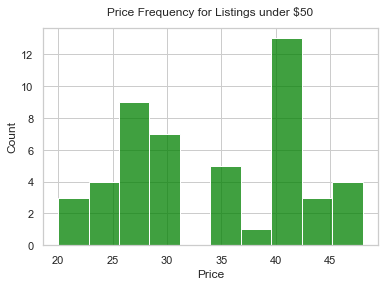

In [12]:
sns.histplot(x='price', data = under_50_df, bins = 10, color = 'g')
plt.title('Price Frequency for Listings under $50', y = 1.03)
plt.xlabel('Price');

### Sample Variance and Standard Deviation of Belize AirBnB Data

We use sample variance and standard deviation because we have a sample of data and not necessarily the whole population.  If we were certain the data was the whole population, we could calculate the statistics with population instead of sample.

**About the data:**

The variance is a measure of distance or spread from the mean and is the square of the standard deviation.  Variance is great when there is a wider range of numbers. Standard deviation also looks at the spread.  If the data is further from the mean, the deviation is higher than if the numbers were closer to mean.

Standard deviation is abreviated as std dev and variance is abreviated as var.

* id and host id - while numerical in value, the std dev and var have no meaning because the underlying is just an identifier
* The **latitude** (in degrees of latitude) std dev and variance are small, suggesting a Belize as a country is smaller. Belize is geographically taller than wider, so the latitude std and variance are larger than the longitude std dev and var.
* The **longitude** (in degrees of longitude) std dev and variance are even smaller than the latitude.   Both suggest the data comes from narrow geographic range.   This would be unlike the US if all AirBnB data was gathered due to the geographic mass of the US.
* The **price** ('$ dollars') has a very large var and std dev.  This sugguests there is a tremendous range in from price from very low, to very high.   There are possibly very high outliers as the data mean is 357 and the std dev is 563.   So a majority of prices would be between 0 and ~900.  This also can been seen on the price frequency chart.
* The **minimum number of nights** data has a wide spread with a high variance.   Both std dev and var sugguest that many rentals may have no minimum number of nights to rentals that may have weekly minimums.
* The var and std dev for **number of reviews** is high.  So there are plenty of listings with no reviews to listings with more than 15.
* The **reviews per month** std dev and var are low.  So number of reviews per month for a listing might range from 0 to 1.
* The **calculated host listing count** is the number of row or listing a particular host has.  The std dev and var are high.  So hosts may range from someone with one listing to hosts with 50 or more listings.
* The std dev and var for **availabilty 365** (nights available to a particular listing) is very high.  Some properties may very popular or otherwise have low rental availability (such as owner occupied much of the year) and some listings are available almost the entire year (not popular properties or new lisitngs).

In [13]:
pd.set_option('display.float_format', lambda x: '%.5f' % x) #display numbers as floats instead of scientific notation
belize_stats = pd.DataFrame()
belize_stats['std_dev'] = belize_df.std(ddof=1, numeric_only=True)
belize_stats['variance'] = belize_df.var(ddof=1, numeric_only=True)
belize_stats['mean'] = belize_df.mean(numeric_only=True)
belize_stats['measurement'] = ['N/a', 'N/a', 'degrees', 'degrees', '$', 'number of nights', 'number of reviews', 
                         'number of reviews', 'number of listings', 'nights available']
belize_stats['scale'] = ['ordinal?', 'ordinal?', 'ratio', 'ratio', 'interval?', 
                         'nominal', 'nominal', 'nominal', 'nominal', 'nominal']
belize_stats

,std_dev,variance,mean,measurement,scale
id,12889638.87528,166142790335142.78125,27924897.17275,N/a,ordinal?
host_id,101800143.09139,10363269133427254.00000,124027839.03469,N/a,ordinal?
latitude,0.53744,0.28884,17.44829,degrees,ratio
longitude,0.38388,0.14736,-88.29203,degrees,ratio
price,563.12482,317109.56807,357.10229,$,interval?
minimum_nights,5.66984,32.14712,2.26395,number of nights,nominal
number_of_reviews,30.32777,919.77351,14.45351,number of reviews,nominal
reviews_per_month,0.66215,0.43845,0.53809,number of reviews,nominal
calculated_host_listings_count,51.71118,2674.04641,22.84835,number of listings,nominal
availability_365,120.61763,14548.61316,280.31545,nights available,nominal


In [14]:
pd.reset_option('display.float_format') #revert back to normal pandas settings for number format

### AirBnB Listings Availability

* 39.52% of listings are available 360 or more days
* 61.55% of listings are available 360 or less days

The distributions of listings available days looks skewed towards more listings available 350 days or more.  It almost looks exponential, but has a tail with that peaks near zero (or fully booked).  Perhaps a bimodal or a beta distribution(?).

In [15]:
num_of_Listings = belize_df['availability_365'].count()  #total number of listings
# calculate percentage of listings >= 360 available
over_360_df = belize_df[belize_df['availability_365'] >= 360]
over_360_perct = over_360_df['availability_365'].count()/num_of_Listings*100
print('Availabilty >= 360 ', round(over_360_perct, 2), '%')
# calculate percentage of listings <= 360 available
under_360_df = belize_df[belize_df['availability_365'] <= 360]
under_360_perct = under_360_df['availability_365'].count()/num_of_Listings*100
print('Availabilty <= 360 ', round(under_360_perct, 2), '%')

Availabilty >= 360  39.52 %
Availabilty <= 360  61.55 %


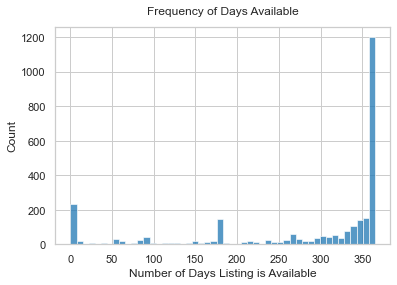

In [16]:
sns.histplot(x = 'availability_365', data = belize_df, bins = 50)
plt.title('Frequency of Days Available', y = 1.03)
plt.xlabel('Number of Days Listing is Available');

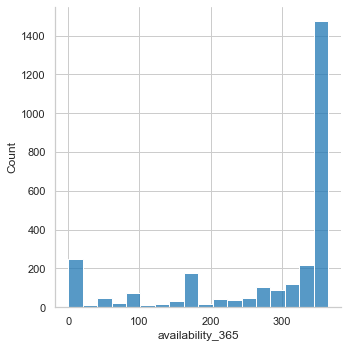

In [17]:
# same plot like above, playing with displot
# I need to do some research on the difference between displot and histplot
sns.displot(x = 'availability_365', data = belize_df);

### AirBnB Belize Minimum Night Count

75% (actually much more) of all the AirBnB listings in the Belize data have minimum of one night or more nights.

In [18]:
belize_df['minimum_nights'].describe()

count    2796.000000
mean        2.263948
std         5.669843
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max       180.000000
Name: minimum_nights, dtype: float64

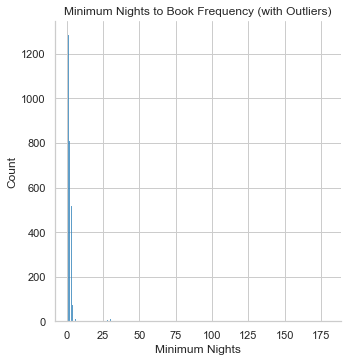

In [19]:
sns.displot(x = 'minimum_nights', data = belize_df)
plt.title('Minimum Nights to Book Frequency (with Outliers)')
plt.xlabel('Minimum Nights');

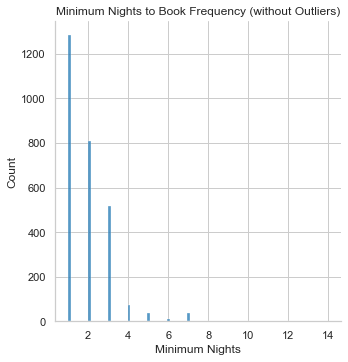

In [20]:
no_outliers = belize_df[belize_df['minimum_nights'] < 25]
sns.displot(x = 'minimum_nights', data = no_outliers)
plt.title('Minimum Nights to Book Frequency (without Outliers)')
plt.xlabel('Minimum Nights');

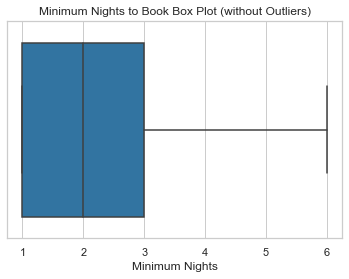

In [21]:
sns.boxplot(x = 'minimum_nights', data = belize_df, showfliers = False)
plt.title('Minimum Nights to Book Box Plot (without Outliers)')
plt.xlabel('Minimum Nights');

In [22]:
# playing with the .agg function - perhaps I should have used it on Q4
# then I wouldn't have dealt with scientific notation issues
belize_df.agg(["mean", 'var', 'std']).transpose()

,mean,var,std
id,2.792490e+07,1.661428e+14,1.288964e+07
host_id,1.240278e+08,1.036327e+16,1.018001e+08
latitude,1.744829e+01,2.888413e-01,5.374396e-01
longitude,-8.829203e+01,1.473608e-01,3.838760e-01
price,3.571023e+02,3.171096e+05,5.631248e+02
minimum_nights,2.263948e+00,3.214712e+01,5.669843e+00
number_of_reviews,1.445351e+01,9.197735e+02,3.032777e+01
reviews_per_month,5.380884e-01,4.384482e-01,6.621542e-01
calculated_host_listings_count,2.284835e+01,2.674046e+03,5.171118e+01
availability_365,2.803155e+02,1.454861e+04,1.206176e+02
